# 4. 파이토치 기본
## 4.3 데이터 불러오기

### 4.3.1 파이토치 제공 데이터 사용

In [3]:
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.9 MB/s eta 0:00:0000:0100:01
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 2.6 MB/s eta 0:00:0000:01
  Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)


In [4]:
import torch # 파이토치 기본 라이브러리 
import torchvision # 이미지 관련 된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np # 넘파이 기본 라이브러리
import matplotlib.pyplot as plt

In [5]:
# tr.Compose 내에 원하는 전처리 tkdlwm를 차례대로 넣어주면 된다.

transf = tr.Compose([tr.Resize(16),tr.ToTensor()]) # 16x16으로 이미지 크기 변환 후 텐서 타입으로 변환한다.
# 원본 이미지의 너비나 높이가 다른 경우 tr.Compose(tr.Resize((16, 16)))으로 바꿔야함 




#### github 용량 때문에 실습 후에 데이터는 삭제

In [7]:
# torchvision.datasets에서 제공하는 CIFAR10 데이터를 불러온다.
# root에는 다운로드 받을 경로를 입력한다. =>데이터 폴더 생성
# train=Ture이면 학습 데이터를 불러오고 train=False이면 테스트 데이터를 불러온다.
# 미리 선언한 전처리를 사용하기 위해 transform=transf을 입력한다.

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf) # root에 train 데이터를 다운로드해서 transf 로 지정한 형태로 바꾸기
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
# 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플(tuple) 형태다. (이미지, 라벨)


print(trainset)
print(trainset[0]) # trainset[0]은 학습 데이터의 첫 번째 데이터로 이미지 한 장과 라벨 숫자 하나가 저장되어 있다.
print(trainset[0][0].size()) # 즉, trainset[0][0]은 이미지이며 trainset[0][1]은 라벨이다.

# 현재 이미지 사이즈는 3x16x16이다. 여기서 3은 채널 수를 말하고 16x16은 이미지의 너비와 높이를 의미한다.
# 일반적인 컬러 사진은 RGB 이미지이기 때문에 채널이 3개 이고 (너비)x(높이)x(채널 수)로 크기가 표현된다.
# 하지만 파이토치에서는 이미지 한 장이 (채널 수)x(너비)x(높이)으로 표현되니 유의하도록 한다.

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=16, interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
(tensor([[[0.1137, 0.2039, 0.4118, 0.5176, 0.5098, 0.4588, 0.4824, 0.4863,
          0.4824, 0.4863, 0.5098, 0.5176, 0.5490, 0.5725, 0.5490, 0.5216],
         [0.1333, 0.3020, 0.4510, 0.4627, 0.4510, 0.4431, 0.4667, 0.4902,
          0.4667, 0.4745, 0.5137, 0.5176, 0.5020, 0.5176, 0.4824, 0.4275],
         [0.2824, 0.4392, 0.4980, 0.4667, 0.4627, 0.4588, 0.4353, 0.4196,
          0.4000, 0.4000, 0.4431, 0.4824, 0.5216, 0.4667, 0.3647, 0.2549],
         [0.4392, 0.5020, 0.5137, 0.5020, 0.5059, 0.4549, 0.3137, 0.3059,
          0.5294, 0.3647, 0.3176, 0.4431, 0.5333, 0.4824, 0.3961, 0.3647],
         [0.5569, 0.5412, 0.4980, 0.5059, 0.5020, 0.3725, 0.2588, 0.3608,
          0.6392, 0.5059, 0.3765, 0.3608, 0.4667, 0.5216, 0.4941, 0.502

In [10]:
# DataLoader는 데이터를 미니 배치 형태로 만들어 준다.
# 따라서 배치 사이즈 및 무작위로 섞어서 만드는 셔플여부 등을 선택할 수 있다.
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=False)

In [13]:
print(len(trainloader))
# CIFAR10의 학습 이미지는 50,000장이고 배치 사이즈가 50장이므로 1,000은 배치의 개수가 된다.
# 즉 trainloader가 잘 만들어졌다는 것을 단편적으로 알 수 있다.
print(len(testloader))
#testloader는 10000장

1000
200


In [15]:
# iter, next를 이용해 일부 데이터를 확인할 수 있다.
#images, labels = iter(trainloader).next()
images, labels = next(iter(trainloader))#파이토치 버전 업그레이드에 따라 코드 바뀜
print(images.size())
# 일반적으로 학습 데이터는 4차원 형태로 모델에서 사용된다.
# (배치 크기)x(채널 수)x(너비)x(높이)

torch.Size([50, 3, 16, 16])


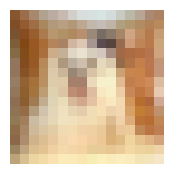

In [16]:
oneshot = images[1].permute(1,2,0).numpy() #이미지의 크기는 [3, 16, 16]인데 permute를 통해 채널 수가 제일 뒤로 가는[16, 16, 3]의 형태로 바꿔야함=> 넘파이 파일로 바꿈
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

### 4.3.2 같은 클래스 별로 폴더를 정리한 경우

In [32]:
# 데이터가 같은 클래스 별로 미리 폴더를 정리 된 경우, ImageFolder의 1줄 선언으로 개인 데이터를 사용할 수 있다.
# 별도의 라벨링이 필요 없으며 폴더 별로 자동으로 라벨링을 한다.
# 예를 들어 class 폴더에 tiger, lion 폴더(./class/tiger와 ./class/lion)를 미리 만든다 => 책 파일에서 다운로드해서 옮기기(png 파일 여러개)
# 다음으로 ImageFolder에 상위 폴더 ./class를 입력하면 이미지와 라벨이 정리 되어 데이터를 불러온다.

transf = tr.Compose([tr.Resize((128, 128)),tr.ToTensor()]) # 128x128 이미지 크기 변환 후 텐서로 만든다. ((128, 128))
trainset = torchvision.datasets.ImageFolder(root='./class', transform=transf) # 커스텀 데이터 불러온다.
trainloader = DataLoader(trainset, batch_size=2, shuffle=False) # 데이터를 미니 배치 형태로 만들어 준다.

#라벨별로 폴더 정리가 되어있어야 함
# 정리하고 싶지만 다른 작업들과 공유하는 데이터인 경우 폴더 정리 어려움
# 이미지 데이터라도 텍스트, 리스트, 배열등 다른형태로 되어있으면 사용 어려움

In [34]:
dataiter = iter(trainloader)
images, labels = next(dataiter) # 
print(images.size(),labels)



torch.Size([2, 3, 128, 128]) tensor([0, 0])


### 4.3.3 정리되지 않은 커스텀 데이터 불러오기

In [36]:
from torch.utils.data import Dataset #Dataset을 상속받아서 DataLoader에서 배치 단위로 불러

class MyDataset(Dataset):  
    
    def __init__(self):
    
    def __getitem__(self, index): # index에 맞는 샘플 찾아서 주기
    
    def __len__(self): # 크기 반환

IndentationError: expected an indented block (177628596.py, line 7)

In [35]:
# 32x32 컬러 이미지와 라벨이 각각 100장이 있다고 가정하다.

train_images = np.random.randint(256,size=(100,32,32,3))/255 # (이미지 수)x(너비)x(높이)x(채널 수) 32*32 사이즈의 채널이 두개 있는 이미지 100장
train_labels = np.random.randint(2,size=(100,1)) # 라벨 수


# 이미지 전처리 작업이 필요할 경우 openCV와 같은 라이브러리를 이용하여 이 곳에서 작업할 수도 있다.
# 필자는 이 단계에서 전처리하는 것을 선호한다. 그 이유는 torchvision.transforms 라이브러리 보다
# OpenCV, SciPy와 같은 라이브러리가 더 많은 전처리 기술을 제공하며 이미지를 미리 처리해 놓고 전처리 된 이미지를 살펴보면서 
# 작업하는 것을 좋아하기 때문이다. 따라서 사용 목적과 편의성에 맞게 본인이 전처리를 어디서 할 지 정하면 될 것이다.

#......
#......
#......
#train_images, train_labels = preprocessing(train_images, train_labels)
#......
#......
#......

print(train_images.shape, train_labels.shape)

(100, 32, 32, 3) (100, 1)


In [37]:
"""
from torch.utils.data import Dataset

class MyDataset(Dataset):  
    
    def __init__(self):
    
    def __getitem__(self, index):
    
    def __len__(self):

이 양식을 통으로 가지고 다니자!!
"""

class TensorData(Dataset):

    def __init__(self, x_data, y_data): # xdata = 이미지, ydata = 라벨
        self.x_data = torch.FloatTensor(x_data) # 이미지 데이터를 FloatTensor로 변형
        self.x_data = self.x_data.permute(0,3,1,2) # (이미지 수)x(너비)x(높이)x(채널 수) -> (배치 크기)x(채널 수)x(너비)x(높이)
        self.y_data = torch.LongTensor(y_data) # 라벨 데이터를 LongTensor로 변형
        self.len = self.y_data.shape[0] # 클래스 내의 들어 온 데이터 개수 

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index] # 뽑아 낼 데이터를 적어준다.

    def __len__(self):
        return self.len # 클래스 내의 들어 온 데이터 개수  

# 파이토치에서는 (배치 크기)x(채널 수)x(너비)x(높이) 데이터가 사용 되므로 원래 데이터 (이미지 수)x(너비)x(높이)x(채널 수)를 변경해야만 한다. 
# permute에서 0(이미지 수), 1(너비),2 (높이), 3(채널 수)을 0(이미지 수), 3(채널 수), 1(너비),2 (높이)로 바꿔주는 것이기 때문에
# .permute(0,3,1,2)을 사용하는 것이다.

In [38]:
train_data = TensorData(train_images,train_labels) # 텐서 데이터 불러오기 
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) # 미니 배치 형태로 데이터 갖추기

### 4.3.4 커스텀 데이터와 커스텀 전처리 사용하기

In [1]:
import torch
import torchvision.transforms as tr # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np # 넘파이 기본 라이브러리
import matplotlib.pyplot as plt

In [2]:
# 32x32 컬러 이미지와 라벨이 각각 100장이 있다고 가정하다.
# glob -> PIL, openCV ..
train_images = np.random.randint(256,size=(100,32,32,3))/255 # (이미지 수)x(너비)x(높이)x(채널 수)
train_labels = np.random.randint(2,size=(100,1)) # 라벨 수

In [3]:
# 전처리 기술을 직접 만들어 보자.
# torch는 이미지가 Tensor 타입일 때 전처리 함수를 사용가능하다. => 
# 이 때 위 기본 양식과 같이 사용하기 위해 call 함수를 사용한다.
# def __call__ 내의 원하는 전처리 작업을 프로그래밍 할 수 있다.

# 1. 텐서 변환 # 입력 데이터를 텐서 데이터로 변환해 주고 학습에 맞는 크기로 변환하는 작업 담당
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs) # 텐서로 변환
        inputs = inputs.permute(2,0,1) # 크기 변환 => 입력 값을 하나씩 가져오기 때문에 (2, 0, 1) 채널, 높이, 너비
        return inputs, torch.LongTensor(labels) # 텐서로 변환

# 2. 선형식    연산
class LinearTensor:
    
    def __init__(self, slope=1, bias=0):
        self.slope = slope
        self.bias = bias     
        
    def __call__(self, sample):
        inputs, labels = sample
        inputs = self.slope*inputs + self.bias # ax+b 계산하기
        return inputs, labels 

# 2. CutOut  
# 이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 증식 방법  
class CutOut:
    
    def __init__(self, ratio=.5): #기본 ratio는 50% => 불러온 이미지에 대해서 50%확률로 Cutoff 발생
        self.ratio = int(1/ratio) 
           
    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0, self.ratio, 1)) #active는 50%의 경우 0과 1중 하나를 뽑게 되고 , 0이면 Cutout발생, 1이면 원본 그대로
        
        if active == 0: #Cutout 발생 시
            _, w, h = inputs.size() # 너비와 높이
            min_len = min(w, h) #너비와 높이의 최소 값
            box_size = int(min_len//4) #cutout의 크기는 최소값의 1/4
            idx = int(np.random.randint(0, min_len-box_size, 1)) #Cutout 박스의 좌측 상단 꼭지점 위치 랜덤으로 구함
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0 # 그걸 0으로 바꿈
        
        return inputs, labels


# ..... 
# 추가로 계속 원하는 전처리를 정의하자.
# ..... 

In [4]:
# 3.3에서 사용한 양식을 그대로 사용하되 전처리 작업을 할 수 있도록 transform을 추가한다. 
class MyDataset(Dataset):
    
    def __init__(self, x_data, y_data, transform=None): # Transform(전처리 )기본값은 하지 않는것
        
        self.x_data = x_data # 넘파이 배열이 들어온다.
        self.y_data = y_data # 넘파이 배열이 들어온다.
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()
    
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        
        if self.transform: #transform이 None 이 아니면
            sample = self.transform(sample) #self.transform이 None이 아니라면 전처리를 작업한다.
        else:
            sample = self.tensor(sample) #Non이면 그냥 텐서로 바꿔서 진행       
        
        return sample 
    
    def __len__(self):
        return self.len       

In [5]:
#trans = tr.Compose([ToTensor(),LinearTensor(2,5)]) # 텐서 변환 후 선형식 2x+5 연산
trans = tr.Compose([ToTensor(),CutOut()]) #tr.ToTensor가 아닌 우리가 만든 ToTensor 클래스 이용 
dataset1 = MyDataset(train_images,train_labels, transform=trans)  #transform => Dataset 패키지의 transform
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

# ToTensor()와 tr.ToTensor()의 차이
# 앞 서 사용한 tr.ToTensor()는 import torchvision.transforms as tr를 이용한 파이토치 메소드를 이용한 것이고
# ToTensor()는 위에서 정의 된 메소드를 사용한 것이다.

In [7]:
images1, labels1 = next(iter(train_loader1)) # dataset1 에서 10개의 랜덤 배치
print(images1.size()) # 배치 및 이미지 크기 확인

torch.Size([10, 3, 32, 32])


In [8]:
import torchvision
def imshow(img):
    plt.figure(figsize=(10,100))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

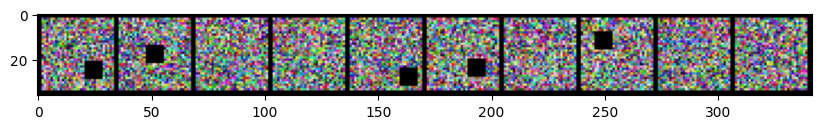

In [9]:
imshow(torchvision.utils.make_grid(images1,nrow=10)) #한 행에 10개 나오게 그리드 만들기

### 4.3.5 커스텀 데이터와 파이토치 제공 전처리 사용하기

In [10]:
# torchvision.transforms에서 제공하는 전처리 기술을 사용한다.
# torchvision.transforms은 입력 이미지가 일반적으로 PILImage 타입이나 텐서일 경우에 동작한다.
# 현재 데이터는 넘파이 배열이다. 따라서 텐서 변환 후 tr.ToPILImage()을 이용하여 PILImage 타입으로 만들어 준다.
# __call__을 이용한 기본 구조는 동일하다.

class MyTransform:
    
    def __call__(self, sample):
        inputs, labels = sample #샘플을 이미지와 라벨로 나눔
        inputs = torch.FloatTensor(inputs) #이미지는 텐서 파일로 바꿈
        inputs = inputs.permute(2,0,1) # 채널, 높이 너비 순
        labels = torch.FloatTensor(labels) #라벨도 텐서로 바꿈

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()]) # PILImage로 바꾸고, 128 사이즈로 바꾼다음에 텐서로 바꾸기
        final_output = transf(inputs)      # 이것을 이미지에 적용
        
        return final_output, labels  

In [11]:
dataset2 = MyDataset(train_images,train_labels, transform=MyTransform())# 위에서 적용한 방식대로 전처리
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

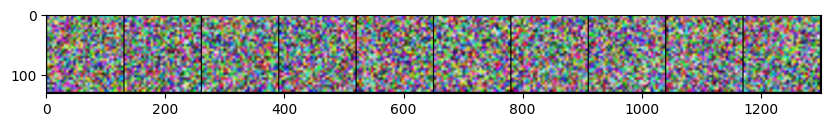

torch.Size([10, 3, 128, 128])


In [13]:
images2, labels2 = next(iter(train_loader2))
imshow(torchvision.utils.make_grid(images2,nrow=10))
print(images2.size()) # 배치 및 이미지 크기 확인

### 4.3.6 커스텀 데이터와 파이토치 제공 전처리 사용하기

In [21]:
class CutOut:
    
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
           
    def __call__(self, inputs):

        active = int(np.random.randint(0, self.ratio, 1)) #0과 1사이 50%로 나오기
        
        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len//4) #최소 사이즈의 1/4
            idx = int(np.random.randint(0, min_len-box_size, 1)) #위치 찾기
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0
        
        return inputs #위의 예시와 다르게 label은 받지 않음 => tr.Compose()안에 있는 기능들은 이미지만 받음

In [22]:
# 3.3에서 사용한 양식을 그대로 사용하되 전처리 작업을 할 수 있도록 transform을 추가한다. 
class MyDataset(Dataset):
    
    def __init__(self, x_data, y_data, transform=None):
        
        self.x_data = x_data # 넘파이 배열이 들어온다.
        self.y_data = y_data # 넘파이 배열이 들어온다.
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor()
    
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        
        if self.transform:
            sample = self.transform(sample) #self.transform이 None이 아니라면 전처리를 작업한다.
        else:
            sample = self.tensor(sample)
        
        return sample
    
    def __len__(self):
        return self.len       

In [23]:
class MyTransform:
    
    def __call__(self, sample):
        inputs, labels = sample
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2,0,1)
        labels = torch.FloatTensor(labels)

        transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor(), CutOut()]) #하나씩 실행
        final_output = transf(inputs)      
        
        return final_output, labels  

#### 전처리 적용

In [24]:
dataset3 = MyDataset(train_images,train_labels, transform=MyTransform())
train_loader3 = DataLoader(dataset3, batch_size=10, shuffle=True)

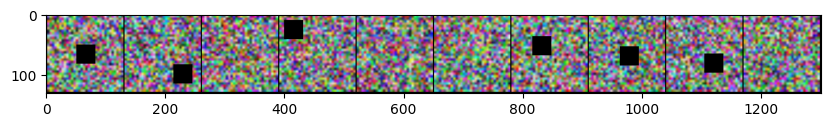

torch.Size([10, 3, 128, 128])


In [25]:
images3, labels3 = next(iter(train_loader3))
imshow(torchvision.utils.make_grid(images3,nrow=10))
print(images3.size()) # 배치 및 이미지 크기 확인

#### 전처리 미적용

In [26]:
dataset3 = MyDataset(train_images,train_labels)
train_loader3 = DataLoader(dataset3, batch_size=10, shuffle=True)

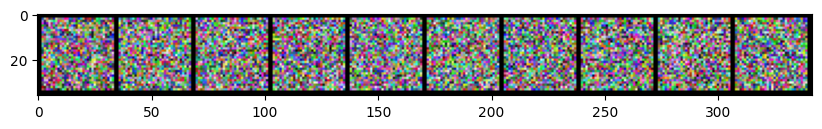

torch.Size([10, 3, 32, 32])


In [28]:
images3, labels3 = next(iter(train_loader3))
imshow(torchvision.utils.make_grid(images3,nrow=10))
print(images3.size()) # 배치 및 이미지 크기 확인

#### CIFAR100 데이터와 커스텀 전처리 사용

In [29]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()]) #resize, 텐서로 바꾸고, Cutout까지
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf) #전처리 적용 

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


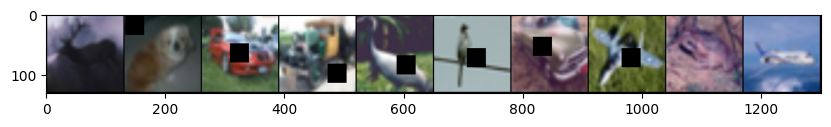

torch.Size([10, 3, 128, 128])


In [30]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = next(iter(trainloader))
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size()) # 배치 및 이미지 크기 확인

### 기본 내용 정리

next(iter())  
__call__  
___get_items__  
tr  
dataloader   
dataset

In [ ]:
def __call__() 